<a href="https://colab.research.google.com/github/pshvaa/TCGA-Gene-Expression-Clustering/blob/main/KMeans_with_syntethic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering with syntethic data**

In [1]:
!pip install kneed

# Importing libraries

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
features, true_labels = make_blobs(n_samples = 200, centers = 3, cluster_std = 2.75, random_state = 42)

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [5]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [6]:
scaler = StandardScaler()
transformed_features = scaler.fit_transform(features)
transformed_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [7]:
kmeans = KMeans(init = 'random', n_clusters = 3, n_init = 10, max_iter = 300, random_state = 42)

In [8]:
kmeans.fit(transformed_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [9]:
# The minimum SSE value
kmeans.inertia_

74.57960106819854

In [10]:
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [11]:
#The number of iterations required to converge
kmeans.n_iter_

10

In [12]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

In [13]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [14]:
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 10,
    "max_iter" : 300,
    "random_state" : 42
}

sse = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(transformed_features)
  sse.append(kmeans.inertia_)

In [15]:
sse

[399.9999999999999,
 173.23074893877765,
 74.57960106819854,
 61.372276288096494,
 52.27538725902107,
 45.18296492976128,
 40.4655696972595,
 34.79423830005605,
 30.741955827546203,
 28.200015604968417]

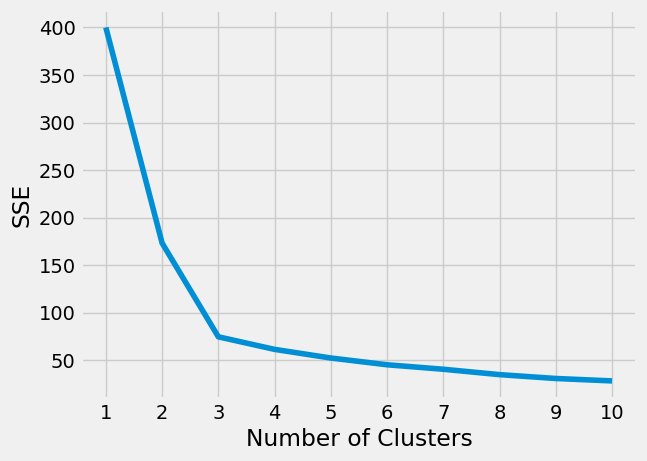

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.xticks(range(1, 11))
plt.show()

In [17]:
kl = KneeLocator(range(1, 11), sse, curve = "convex", direction = "decreasing")

In [18]:
kl.elbow

3

In [19]:
# a list for hold silhouette coefficients for each k
silhouette_scores = []

#at least 2 cluster required for silhouette coefficients
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(transformed_features)
  silhouette_scores.append(silhouette_score(transformed_features, kmeans.labels_))

In [20]:
silhouette_scores #[-1, 1]

[0.5449728784485278,
 0.5915043942870359,
 0.4942652789850353,
 0.39172760330275125,
 0.33841064280869715,
 0.33874040275554307,
 0.35020175625136163,
 0.3650337813526654,
 0.3641264983430456]

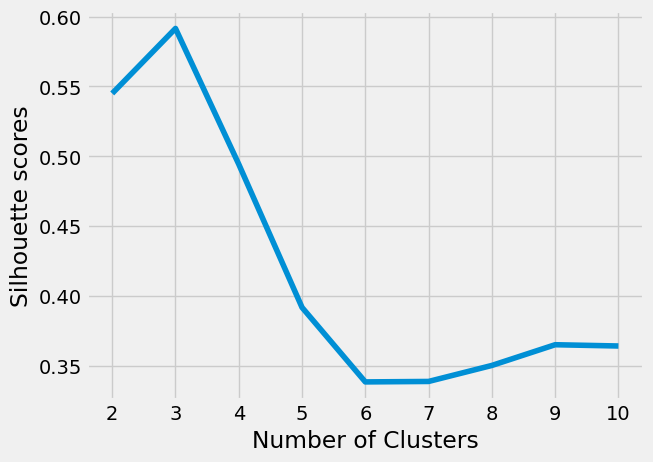

In [21]:
plt.plot(range(2,11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette scores")
plt.show()

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [23]:
features, true_labels = make_moons(n_samples = 250, noise = 0.05, random_state = 42)
scaled_features = scaler.fit_transform(features)

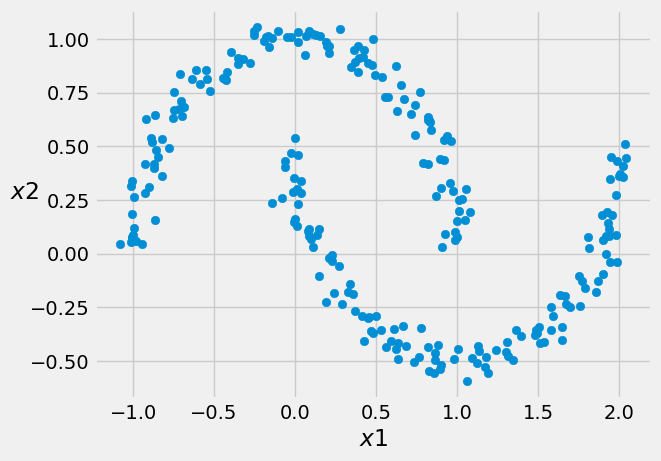

In [24]:
plt.scatter(features[:, 0], features[:, 1])
plt.xlabel("$x$1")
plt.ylabel("$x$2", rotation = 0)
plt.show()

In [25]:
#Comparing scores of two diffrent methods

kmeans = KMeans(n_clusters = 2)
dbscan = DBSCAN(eps = 0.3)

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)

print("KMeans silhouette score: ", kmeans_silhouette)
print("DBSCAN silhouette score: ", dbscan_silhouette)

KMeans silhouette score:  0.5
DBSCAN silhouette score:  0.38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)




*   Normally, the larger silhouette score is better, but that is not the case here



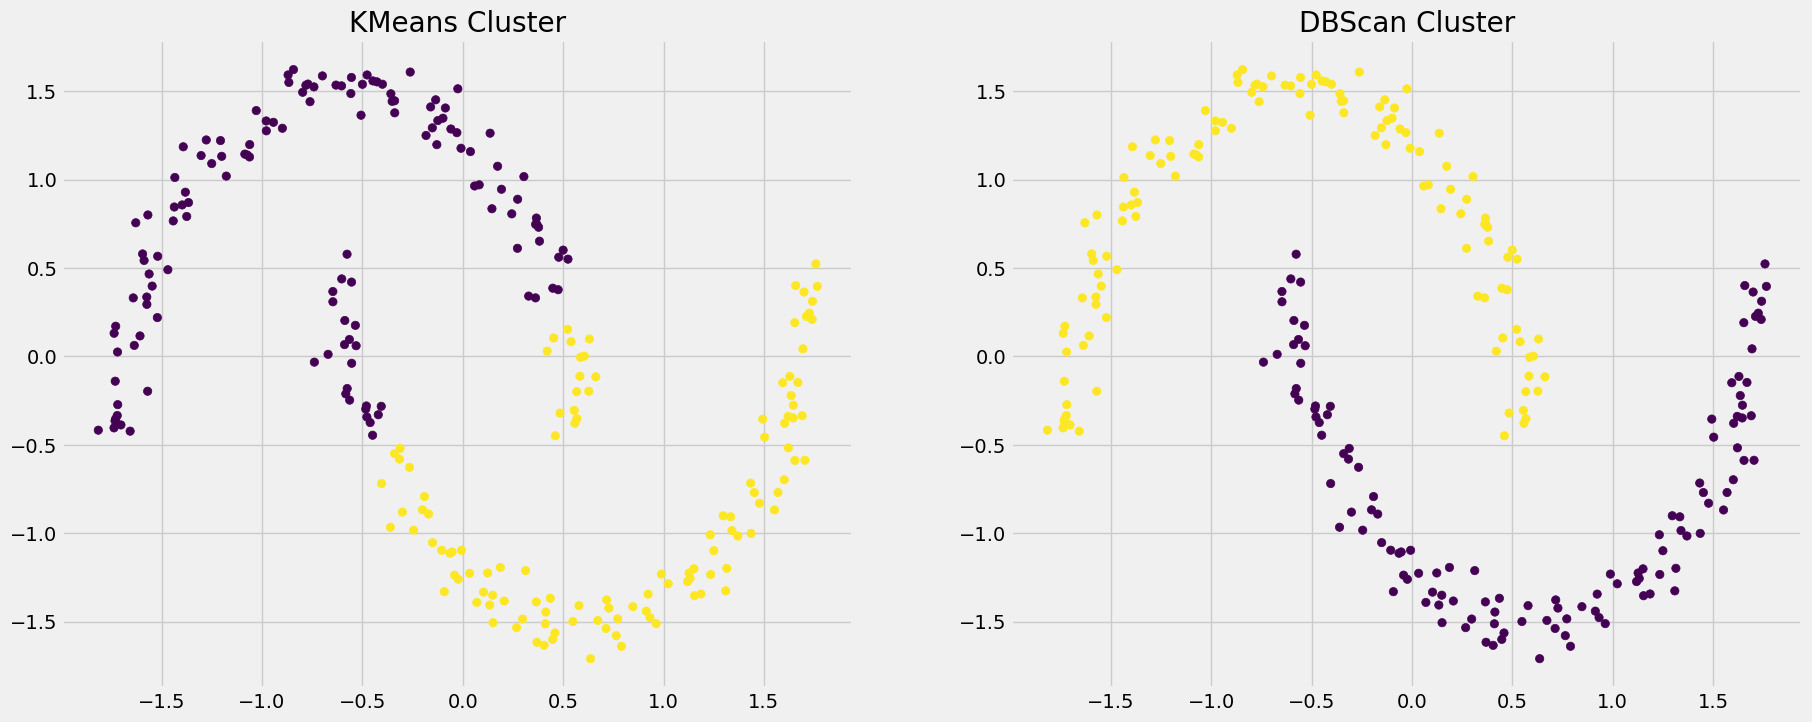

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].set_title("KMeans Cluster")
ax[0].scatter(scaled_features[:, 0], scaled_features[:, 1], c = kmeans.labels_)

ax[1].set_title("DBScan Cluster")
ax[1].scatter(scaled_features[:, 0], scaled_features[:, 1], c = dbscan.labels_)
plt.show()

In [27]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)



print("Adjusted rand score in kmeans: ", round(ari_kmeans, 2))
print("Adjusted rand score in dbscan: " , round(ari_dbscan, 2))

Adjusted rand score in kmeans:  0.47
Adjusted rand score in dbscan:  1.0


*   Clearly, DBSCAN clustering gave us better results in this case



# **K-Means Clustering in Python -- TCGA Cancer Gene Expression**

In [28]:
import tarfile
import numpy as np
import urllib
from sklearn.preprocessing import LabelEncoder

In [29]:
uci_tcga_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
)
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# download the file
r = urllib.request.urlretrieve(full_download_url, archive_name)

# extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

* The KMeans class in scikit-learn requires a NumPy array as an argument. The NumPy package has a helper function to load the data from the text file into memory as NumPy arrays:

In [30]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile, delimiter=",", usecols=range(1, 20532), skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file, delimiter=",", usecols=(1,), skip_header=1, dtype=str
)

In [31]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [32]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

In [33]:
len(data)

801

In [34]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0])

In [35]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [36]:
n_clusters = len(label_encoder.classes_)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

preprocessor = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2, random_state=42))
])

clusterer = Pipeline([
    ("kmeans",
    KMeans(
        n_clusters = n_clusters,
        init = "k-means++",
        n_init = 50,
        max_iter = 500,
        random_state = 42
    ))
])

In [48]:
pipe = Pipeline(
    [("preprocessor", preprocessor),
    ("clusterer", clusterer)]
)

pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [49]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450302

In [50]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [43]:
import pandas as pd

In [51]:
pcadf = pd.DataFrame(
    preprocessed_data,
    columns = ["component_1", "component_2"]
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_labels"] = label_encoder.inverse_transform(true_labels)

In [52]:
pcadf.head()

,component_1,component_2,predicted_cluster,true_labels
0,-5.668141,-8.872139,1,PRAD
1,-1.470204,10.280182,4,LUAD
2,-10.845387,-1.345352,3,PRAD
3,-9.167961,-8.670123,1,PRAD
4,-6.271848,-3.101208,3,BRCA


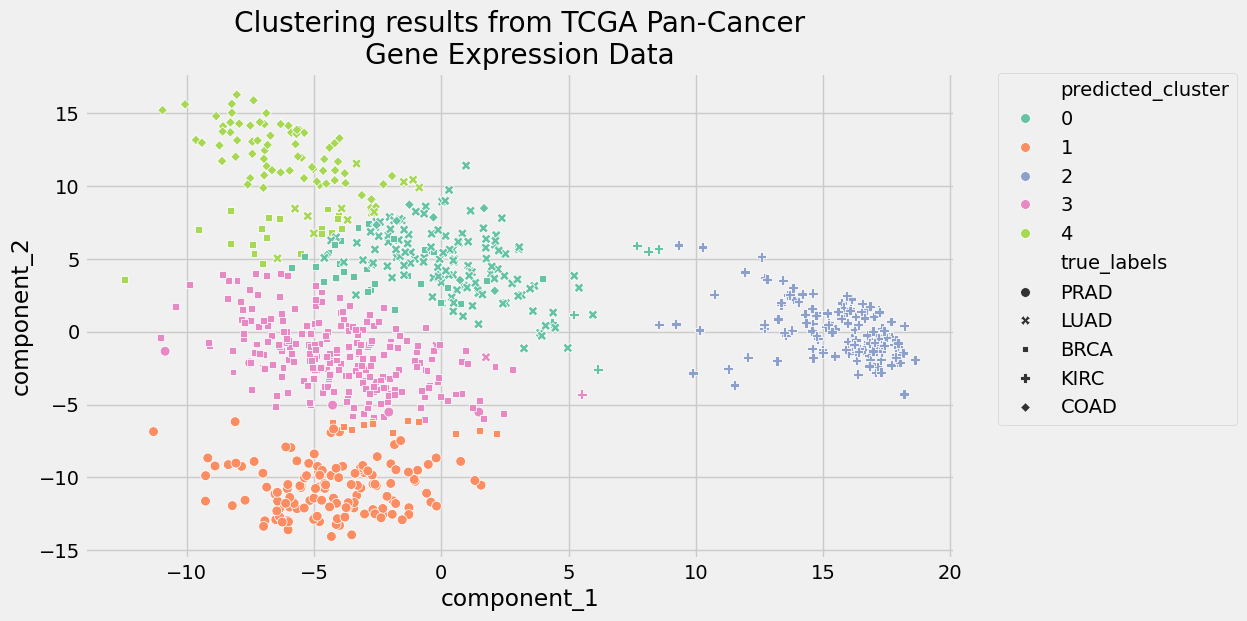

In [62]:
import seaborn as sns

plt.figure(figsize = (10, 6))
plt.style.use("fivethirtyeight")
scat = sns.scatterplot(x = "component_1", y = "component_2",
                data = pcadf,
                s = 50,
                hue = "predicted_cluster",
                style = "true_labels",
                palette = "Set2")
scat.set_title(
   "Clustering results from TCGA Pan-Cancer\nGene Expression Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [61]:
silhouette_scores = []
ari_scores = []

for i in range(2, 11):
  pipe["preprocessor"]["pca"].n_components = i
  pipe.fit(data)

  silhouette_coeff = silhouette_score(
      pipe["preprocessor"].transform(data),
      pipe["clusterer"]["kmeans"].labels_
  )

  ari_score = adjusted_rand_score(true_labels,
                                   pipe["clusterer"]["kmeans"].labels_)

  silhouette_scores.append(silhouette_coeff)
  ari_scores.append(ari_score)

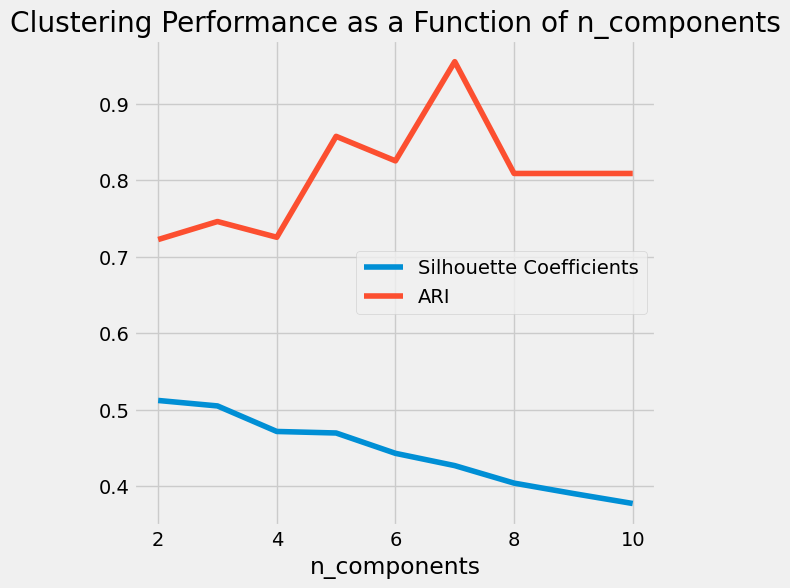

In [68]:
plt.figure(figsize = (6, 6))
plt.title("Clustering Performance as a Function of n_components")
plt.plot(range(2, 11), silhouette_scores,
         label = "Silhouette Coefficients",
         c="#008fd5",)


plt.plot(range(2, 11), ari_scores, label = "ARI", c="#fc4f30")
plt.xlabel("n_components")
plt.legend()
plt.show()

There are two takeaways from this figure:

* *The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.*

* T*he ARI improves significantly as you add components. It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.*